In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import os

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [23]:
# генерим набор данных и сделаем базовую модель
X, y = datasets.make_classification(n_samples=100000, n_features=15, n_informative=2, n_redundant=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [28]:
# RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

list(zip(rfe.support_,rfe.ranking_))
y_pred = rfe.predict(X_test)

In [29]:
# GridSearchCV()
hyper_params = [{'n_features_to_select': np.arange(1,14)}]

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  
print(model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(4)


Fitting 5 folds for each of 13 candidates, totalling 65 fits
0.6121299879212442
RFE(estimator=LinearRegression(), n_features_to_select=2)
{'n_features_to_select': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.146119,0.011803,0.000804,0.000402,1,{'n_features_to_select': 1},0.598989,0.608569,0.613690,0.596681,...,0.604043,0.006267,13,0.605324,0.602927,0.601647,0.605895,0.604498,0.604058,0.001566
1,0.185789,0.064504,0.001030,0.000331,2,{'n_features_to_select': 2},0.607898,0.616239,0.622818,0.603141,...,0.612130,0.006816,1,0.613227,0.611140,0.609493,0.614404,0.612562,0.612165,0.001702
2,0.180884,0.016193,0.002169,0.002376,3,{'n_features_to_select': 3},0.607898,0.616239,0.622818,0.603141,...,0.612130,0.006816,1,0.613227,0.611140,0.609493,0.614404,0.612562,0.612165,0.001702
3,0.153158,0.025367,0.001239,0.000225,4,{'n_features_to_select': 4},0.607898,0.616239,0.622818,0.603141,...,0.612130,0.006816,1,0.613227,0.611140,0.609493,0.614404,0.612562,0.612165,0.001702


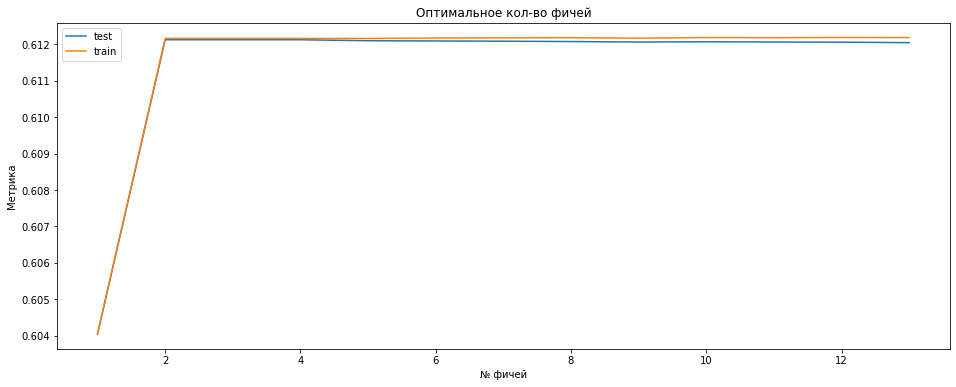

In [30]:
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('№ фичей')
plt.ylabel('Метрика')
plt.title("Оптимальное кол-во фичей")
plt.legend(['test', 'train'], loc='upper left')